In [1]:
import sys
import requests
from time import sleep
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import json

In [2]:
# Variable initialisation
cpt=0
N_request = 10
category = ['tiny','small','medium','large']
listCourse = []

In [3]:
def request(category,cpt) :
	r = requests.get('http://tortues.ecoquery.os.univ-lyon1.fr:8080/'+str(category))
	r_json = r.json()
	recs = r_json['tortoises']
	df = pd.json_normalize(recs)
	df['iterration_update'] = cpt
	return df

In [4]:
while cpt < N_request :
	print('Requete '+str(cpt+1))
	res = request('tiny',cpt)
	listCourse.append(res)
	sleep(3)
	cpt += 1
	
df = pd.concat(listCourse)
df['vitesse'] = 0

Requete 1
Requete 2
Requete 3
Requete 4
Requete 5
Requete 6
Requete 7
Requete 8
Requete 9
Requete 10


In [5]:
df.loc[df.iterration_update == 0,'vitesse'] = -1
df.head(20)

,id,top,position,iterration_update,vitesse
0,0,20654,3725305,0,-1
1,1,20654,7548726,0,-1
2,2,20654,4163941,0,-1
3,3,20654,3991653,0,-1
4,4,20654,3841772,0,-1
5,5,20654,2767416,0,-1
6,6,20654,7125630,0,-1
7,7,20654,4012989,0,-1
8,8,20654,2165255,0,-1
9,9,20654,3701968,0,-1


In [6]:
df = df.sort_values(by=['id','top'])

In [7]:
df ['ecart_position_avec_precedent'] = df.groupby('id')['position'].diff()

In [12]:
df[df.id == 0]

,id,top,position,iterration_update,vitesse,ecart_position_avec_precedent
0,0,20654,3725305,0,-1,NaN
0,0,20655,3725400,1,0,95.0
0,0,20656,3725422,2,0,22.0
0,0,20657,3725639,3,0,217.0
0,0,20658,3725952,4,0,313.0
0,0,20659,3726091,5,0,139.0
0,0,20661,3726660,6,0,569.0
0,0,20662,3726684,7,0,24.0
0,0,20663,3727013,8,0,329.0
0,0,20664,3727181,9,0,168.0


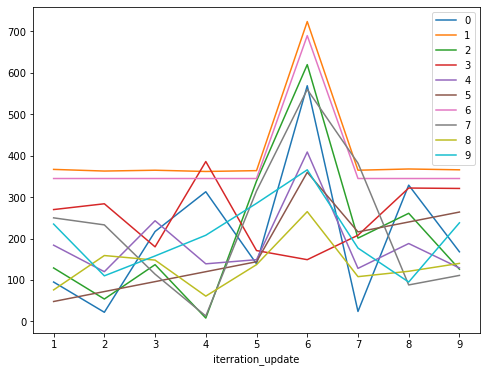

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))

for i, g in df.groupby('id'):
    g.plot(x='iterration_update', y='ecart_position_avec_precedent', ax=ax, label=str(i))

plt.show()

In [13]:
print(df.top.unique())
len(df.top.unique())

[20654 20655 20656 20657 20658 20659 20661 20662 20663 20664]


10